In [1]:
from antcolony.optimization import DijkstraPathFinder, AntColonyPathFinder, SimpleMultiPathFinder, NxMultiPathFinder
from antcolony.parsing import parse_sndlib_weighted

In [2]:
graph_file = "india35.txt"
weight_label = "weights"
start = "1"
end = "10"
n = 1

In [3]:
with open(graph_file) as file:
     graph = parse_sndlib_weighted(file.read(), weight_label)

In [4]:
import timeit
import numpy as np
import networkx as nx

def measure_time(f, *args, repeats=10):
    return 1000.0 * timeit.timeit(lambda: f(*args), number=repeats) / repeats

def measure_accuracy(optimizer, graph, start, end, weight_label, repeats=10):
    shortest_paths = list(nx.all_shortest_paths(graph, start, end, weight=weight_label))
    return np.mean([optimizer.find(graph, start, end).nodes in shortest_paths for _ in range(repeats)])

In [5]:
optimizers = {
    "n_ants": [AntColonyPathFinder(n_ants, 10, 40, 0.5, 1.2, 0.6, 10.0, weight_label) for n_ants in [10, 20, 30, 40, 50]],
    "n_iter": [AntColonyPathFinder(40, n_iters, 40, 0.5, 1.2, 0.6, 10.0, weight_label) for n_iters in [10, 25, 50, 75, 100]],
    "max_steps": [AntColonyPathFinder(40, 10, max_steps, 0.5, 1.2, 0.6, 10.0, weight_label) for max_steps in [10, 20, 30, 40, 50]],
    "alpha": [AntColonyPathFinder(40, 10, 40, alpha, 1.2, 0.6, 10.0, weight_label) for alpha in [0.1, 0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 1.7, 2.0]],
    "beta": [AntColonyPathFinder(40, 10, 40, 0.5, beta, 0.6, 10.0, weight_label) for beta in [1.0, 1.2, 1.6, 2.0, 2.5, 3.0, 4.0, 5.0]],
    "ro": [AntColonyPathFinder(40, 10, 40, 0.5, 1.2, ro, 10.0, weight_label) for ro in [0.1, 0.3, 0.6, 0.8, 1.0, 1.2, 1.5, 1.8, 2.0]],
    "q": [AntColonyPathFinder(40, 10, 40, 0.5, 1.2, 0.6, q, weight_label) for q in [5, 8, 10, 15, 20, 25, 30, 40, 50]]
}

In [6]:
def get_times(optimizers, graph, start, end):
    return [measure_time(optimizer.find, graph, start, end) for optimizer in optimizers]

def get_accuracies(optimizers, graph, start, end, weight_label):
    return [measure_accuracy(optimizer, graph, start, end, weight_label) for optimizer in optimizers]

In [7]:
results = {}
for k, optims in optimizers.items():
    results[k] = {
        "values": [getattr(optim, k) for optim in optims],
        "times": get_times(optims, graph, start, end),
        "accuracies": get_accuracies(optims, graph, start, end, weight_label)
    }
    print(f"{k} completed")

n_ants completed
n_iter completed
max_steps completed
alpha completed
beta completed
ro completed
q completed


In [25]:
import matplotlib.pyplot as plt

def plot_times(param_name, values, times, ax, max_time=None):
    ax.plot(values, times, linestyle='dashed', marker='o')
    ax.set_title(f"Execution times for different {param_name} values")
    ax.set_xlabel(param_name)
    ax.set_ylim(bottom=0, top=max_time)
    ax.set_ylabel("time (ms)")
    
def plot_accuracies(param_name, values, accuracies, ax):
    ax.plot(values, accuracies, linestyle='dashed', marker='o')
    ax.set_title(f"Accuracies for different {param_name} values")
    ax.set_xlabel(param_name)
    ax.set_ylim([-0.05,1.05])
    ax.set_ylabel("accuracy")
    
def plot_comparison(results):
    fig = plt.figure(figsize=(4*2, 4*len(results)))
    max_time = max([t for v in results.values() for t in v["times"]])
    for i, k in enumerate(results):
        ax = fig.add_subplot(len(results), 2, 2*i + 1)
        plot_times(k, results[k]["values"], results[k]["times"], ax, max_time)
        ax = fig.add_subplot(len(results), 2, 2*i + 2)
        plot_accuracies(k, results[k]["values"], results[k]["accuracies"], ax)
    fig.tight_layout()

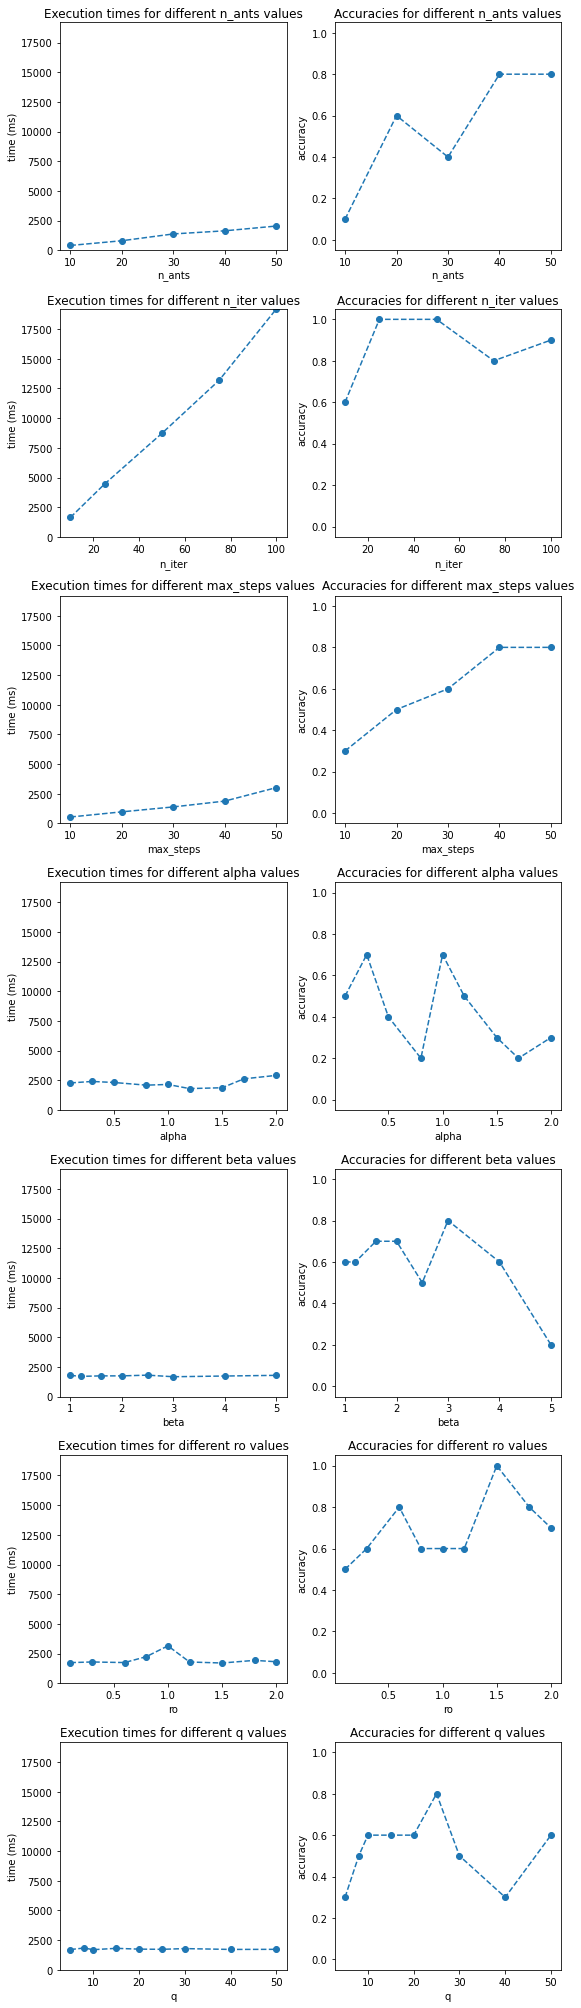

In [26]:
plot_comparison(results)

In [10]:
aco = AntColonyPathFinder(40, 10, 40, 0.5, 1.2, 0.6, 10.0, weight_label)
dijkstra = DijkstraPathFinder(weight_label)

print(f"Ant colony execution time: {measure_time(SimpleMultiPathFinder(aco).find, graph, start, end, n)}")
print(f"Dijkstra's execution time: {measure_time(SimpleMultiPathFinder(dijkstra).find, graph, start, end, n)}")

Ant colony execution time: 1721.1074631952215
Dijkstra's execution time: 0.34616959746927023
